# Task 2

### Our Goal:
To predict the number of COVID-19 cases in the United States.


### Importing the necessary libraries:

In [212]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

### Preparing & Importing the Datasets:

Our main dataset was obtained from https://ourworldindata.org/covid-deaths \
The dataset contains various statistics related to COVID-19 which included but not limited to number of deaths and vaccination rates classified according to the different countries.

In [213]:
file_url = 'https://covid.ourworldindata.org/data/owid-covid-data.csv'
df = pd.read_csv(file_url)
df

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135365,ZWE,Africa,Zimbabwe,2021-11-19,133593.0,0.0,37.714,4699.0,0.0,0.714,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
135366,ZWE,Africa,Zimbabwe,2021-11-20,133615.0,22.0,31.714,4699.0,0.0,0.429,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
135367,ZWE,Africa,Zimbabwe,2021-11-21,133647.0,32.0,31.286,4699.0,0.0,0.429,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
135368,ZWE,Africa,Zimbabwe,2021-11-22,133674.0,27.0,33.714,4699.0,0.0,0.286,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN


### Cleaning the data:

Firstly, we select the columns that we require from the dataset which includes our target and features. 

We then select the row as "United States", since we are focusing on a single country. 

Finally we use the dropna() function to clean the dataset, removing the empty columns.

In [214]:
columns = ["new_cases_smoothed_per_million","hosp_patients_per_million","people_vaccinated_per_hundred","gdp_per_capita","population_density"]

selector = df['location']=='United States'
df1 = df.loc[selector,columns]
df2 = df1.dropna()
df2

,new_cases_smoothed_per_million,hosp_patients_per_million,people_vaccinated_per_hundred,gdp_per_capita,population_density
128074,654.839,322.611,0.01,54225.446,35.608
128075,659.336,329.480,0.01,54225.446,35.608
128076,655.519,333.406,0.02,54225.446,35.608
128077,663.909,336.449,0.07,54225.446,35.608
128078,665.005,337.759,0.14,54225.446,35.608
...,...,...,...,...,...
128414,285.186,135.197,68.29,54225.446,35.608
128415,277.810,135.572,68.43,54225.446,35.608
128416,278.093,134.656,68.54,54225.446,35.608
128417,277.474,135.906,68.58,54225.446,35.608


### Functions we will use:

`normalize_z(df)`: Normalizes the feature using z normalization

`get_features_targets(df, feature_names, target_names)`: Gets columns for the features and the targets from the input argument data frame

`prepare_feature(df_feature)`: Takes in a data frame for the feature. The function will convert the data frame into a numpy array and change it into a column vector. The function will also add a column of constant 1s in the first column

`prepare_target(df_target)`: Takes in a dataframe for the target. \The function will convert thte dataframe into a numpy array and change it into column vectors.

`predict(df_feature, beta)`: Standardizes the feature using z normalization and changes it to a numpy array. A column of 1s will also be added to the numpy array. The function then calls `predict_norm(X, beta)` to get the predicted y values

`predict_norm(X, beta)`: Calculates the straight line equation after standardization and adding of column for constant 1



In [215]:
def normalize_z(df):
    return (df - df.mean(axis=0)) / df.std(axis=0)

def get_features_targets(df, feature_names, target_names):
    df_feature = df[feature_names]
    df_target = df[target_names]
    return df_feature, df_target

def prepare_feature(df_feature):
    cols = len(df_feature.columns)
    feature = df_feature.to_numpy()
    number_of_samples = feature.shape[0]
    return np.concatenate((np.ones((number_of_samples,1)), feature), axis=1)

def prepare_target(df_target):
    return df_target.to_numpy()

def predict(df_feature, beta):
    X = prepare_feature(normalize_z(df_feature))
    return predict_norm(X, beta)

def predict_norm(X, beta):
    return np.matmul(X,beta)

def split_data(df_feature, df_target, random_state=None, test_size=0.5):
    indices = df_target.index
    if random_state is not None:
        np.random.seed(random_state)
    num_rows = len(indices)
    k = int(test_size * num_rows)
    test_indices = np.random.choice(indices, k, replace = False)
    train_indices = set(indices) - set(test_indices)
    df_feature_train = df_feature.loc[train_indices, :]
    df_feature_test = df_feature.loc[test_indices, :]
    df_target_train = df_target.loc[train_indices, :]
    df_target_test = df_target.loc[test_indices, :]
    
    return df_feature_train, df_feature_test, df_target_train, df_target_test

### Building our model:

**Target:** 
- new_cases_smoothed_per_million 

**Features:** 
- hosp_patients_per_million, people_vaccinated_per_hundred, gdp_per_capita, population_density

**Step 1:** Select desired features and targets from the raw data frame

In [216]:
df_features, df_target = get_features_targets(df2,["hosp_patients_per_million","people_vaccinated_per_hundred","gdp_per_capita","population_density"],["new_cases_smoothed_per_million"])

**Step 2:** Plot the various features against the target to observe their relationship

Text(0.5, 0, 'hospital patients per million')

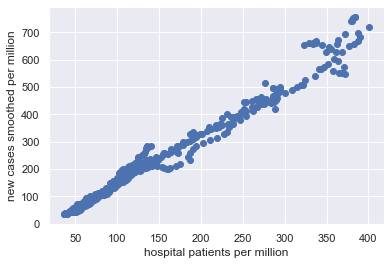

In [217]:
plt.scatter(df_features["hosp_patients_per_million"], df_target)
plt.ylabel("new cases smoothed per million")
plt.xlabel("hospital patients per million")

Text(0.5, 0, 'people vaccinated per hundred')

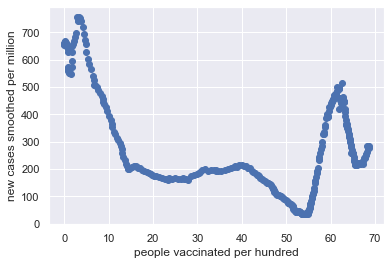

In [218]:
plt.scatter(df_features["people_vaccinated_per_hundred"], df_target)
plt.ylabel("new cases smoothed per million")
plt.xlabel("people vaccinated per hundred")

Text(0.5, 0, 'GDP per capita')

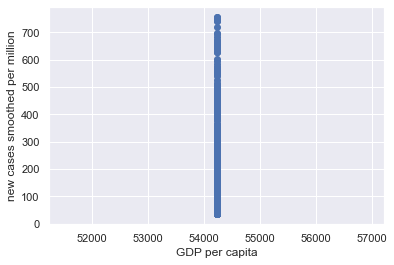

In [219]:
plt.scatter(df_features["gdp_per_capita"], df_target)
plt.ylabel("new cases smoothed per million")
plt.xlabel("GDP per capita")

Text(0.5, 0, 'population')

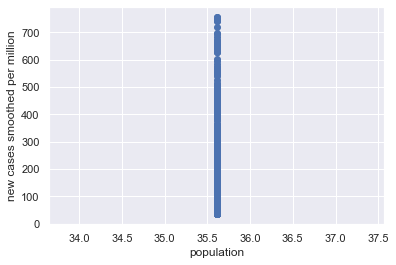

In [220]:
plt.scatter(df_features["population_density"], df_target)
plt.ylabel("new cases smoothed per million")
plt.xlabel("population")

**Step 3:** Split the data set into training and test sets

**Step 4:** Normalize the features using z normalization

**Step 5:** Convert the predictors into a numpy array and add a column of 1s

**Step 6:** Convert the target into a numpy array

In [221]:
df_features_train, df_features_test, df_target_train, df_target_test = split_data(df_features, df_target, random_state=100, test_size=0.3)
df_features_train_z = normalize_z(df_features_train)
X = prepare_feature(df_features_train_z)
target = prepare_target(df_target_train)

`compute_cost(X, y, beta)`: Computes the cost function of a linear regression model. The function takes in two 2-D numpy arrays.

`gradient_descent` : To estimate beta values. The idea is to repeat steps in the opposite direction of the gradient (or approximate gradient) of the function at the current point, to find a local minimum of a differentiable function, in this case, the `compute_cost(X, y, beta)` function.

In [222]:
def compute_cost(X, y, beta):
    J = 0
    m = y.shape[0]
    yp = np.matmul(X,beta)
    error = yp - y
    J = (1/(2*m)) * np.matmul(error.T, error)
    J = J[0][0]
    return J

def gradient_descent(X, y, beta, alpha, num_iters):
    J_storage = np.zeros(num_iters) 
    m = y.shape[0] 
    for i in range(num_iters):
        predicted_y = np.matmul(X, beta) 
        errors = predicted_y - y 
        beta = beta - (alpha/m) * np.matmul(X.transpose(), errors) 
        J_storage[i] = compute_cost(X, y, beta)
    return beta, J_storage

**Step 7:** Call gradient descent function to estimate values of beta

In [223]:
iterations = 1500
alpha = 0.01
beta = np.zeros((X.shape[1],1))

beta, J_storage = gradient_descent(X, target, beta, alpha, iterations)

**Step 8:** Call `predict()` function to obtain predicted x and y values based on obtained beta values and change target test set to a numpy array

In [224]:
pred = predict(df_features_test, beta)
target_test = df_target_test.to_numpy()

**Step 9:** Plot various features against target and pred to observe model

Text(0.5, 0, 'hospital patients per million')

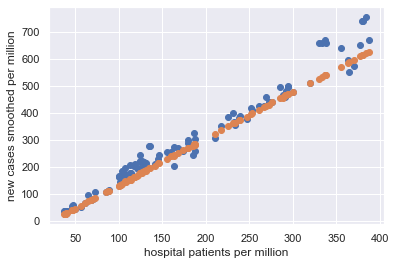

In [225]:
plt.scatter(df_features_test["hosp_patients_per_million"], target_test)
plt.scatter(df_features_test["hosp_patients_per_million"], pred)
plt.ylabel("new cases smoothed per million")
plt.xlabel("hospital patients per million")

Text(0.5, 0, 'people vaccinated per hundred')

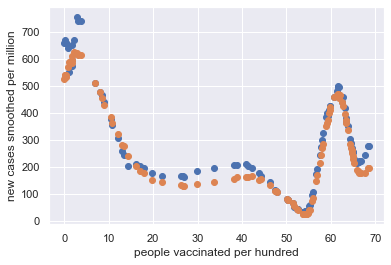

In [226]:
plt.scatter(df_features_test["people_vaccinated_per_hundred"], target_test)
plt.scatter(df_features_test["people_vaccinated_per_hundred"], pred)
plt.ylabel("new cases smoothed per million")
plt.xlabel("people vaccinated per hundred")

Text(0.5, 0, 'GDP per capita')

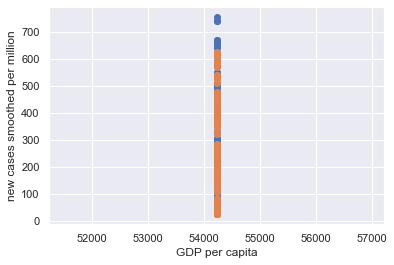

In [227]:
plt.scatter(df_features_test["gdp_per_capita"], target_test)
plt.scatter(df_features_test["gdp_per_capita"], pred)
plt.ylabel("new cases smoothed per million")
plt.xlabel("GDP per capita")

Text(0.5, 0, 'population')

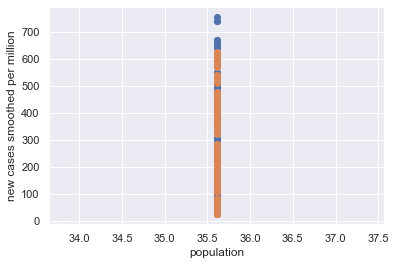

In [228]:
plt.scatter(df_features_test["population_density"], target_test)
plt.scatter(df_features_test["population_density"], pred)
plt.ylabel("new cases smoothed per million")
plt.xlabel("population")

### Metrics to assess our model:

`r2_score`: R2 coefficient of determination $$r^2 = 1 - \frac{SS_{res}}{SS_{tot}}$$
where

$$SS_{res} = \Sigma_{i=1}^n(y_i - \hat{y}_i)^2$$

$$SS_{tot} = \Sigma_{i=1}^n (y_i - \overline{y})^2$$


`mean_squared_error`: $$MSE = \frac{1}{n}\Sigma_{i=1}^n(y_i - \hat{y}_i)^2$$

$y_i$ is the actual target value and $\hat{y}_i$ is the predicted target value.
$n$ is the number of target values.



In [229]:
def r2_score(y, ypred):
    y_mean = np.mean(y)
    ss_res = np.sum((y-ypred)**2)
    ss_tot = np.sum((y - y_mean)**2)
    return 1 - (ss_res/ss_tot)

def mean_squared_error(target, pred):
    n = target.shape[0]
    return 1/n * np.sum((target-pred)**2)

Calculating R2:

In [230]:
r2 = r2_score(target_test, pred)
print(r2)

0.9465917168845952


Calculating Mean Squared Error:

In [231]:
mse = mean_squared_error(target_test, pred)
print(mse)

2028.7374601858207


We now find the error percentage between our actual values and predicted values:

In [232]:
import math

target_avg = target_test.mean()
error_avg = math.sqrt(mse)
error_p = error_avg/target_avg

print(error_p)

0.15162007642284497


### Improvements:

What if we removed the static data (GDP_per_capita, population_density)?

Repeating above steps:

In [233]:
df_features, df_target = get_features_targets(df2,["hosp_patients_per_million","people_vaccinated_per_hundred"],["new_cases_smoothed_per_million"])

df_features_train, df_features_test, df_target_train, df_target_test = split_data(df_features, df_target, random_state=100, test_size=0.3)

df_features_train_z = normalize_z(df_features_train)

X = prepare_feature(df_features_train_z)
target = prepare_target(df_target_train)

iterations = 1500
alpha = 0.01
beta = np.zeros((X.shape[1],1))

beta, J_storage = gradient_descent(X, target, beta, alpha, iterations)

pred = predict(df_features_test, beta)

target_test = df_target_test.to_numpy()

Calculating R2:

In [234]:
r2 = r2_score(target_test, pred)
print(r2)

0.9472969987802077


Calculating MSE:

In [235]:
mse = mean_squared_error(target_test, pred)
print(mse)

2001.947012746644


We now find the error percentage between our actual values and predicted values:

In [236]:
import math

target_avg = target_test.mean()
error_avg = math.sqrt(mse)
error_p = error_avg/target_avg

print(error_p)

0.1506156416175858


### Discussion and Analysis

We can see that when static data was removed, the MSE decreased from about 2028.8 to 2001.9.

Error percentage also decreased from 16% to 15%

This shows that removing static data improves our model, albeit just a little bit.